<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/Clustering/SKLEARN/AXELDAVID_1103210017_TK4504_SKLEARN_CLUSTERING_MALL_CUSTOMERS_BIRCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
SKLearn Clustering<br>


# Import Library

In [16]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from google.colab import drive
import zipfile

# Import Dataset

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json

In [19]:
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/mall-customers.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [21]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [24]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender_Male'].astype(int)

In [25]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
Gender                    int64
dtype: object

 # BIRCH

In [26]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].values

birch = Birch(threshold=0.5, branching_factor=50, n_clusters=None, compute_labels=True)

birch.partial_fit(X)
birch.set_params(n_clusters=5)
birch.partial_fit()


cluster_labels = birch.labels_
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)

df['Cluster'] = cluster_labels

Number of clusters: 198


# Plot

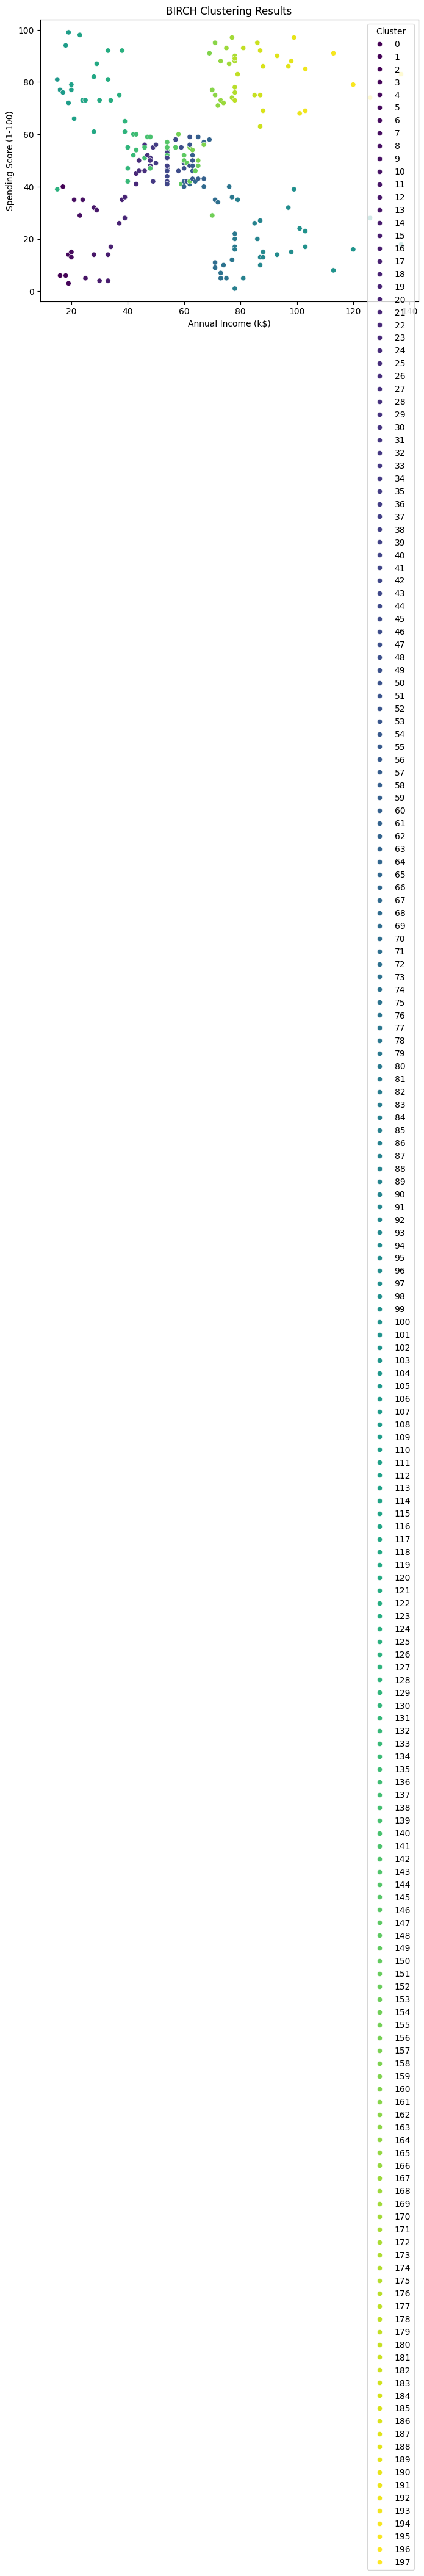

In [28]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('BIRCH Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()